In [1]:
import os
from pprint import pprint
import pandas as pd
import numpy as np
import itertools
import sklearn.datasets as datasets
import ndg_tools
from ndg_tools.sklearn.vectorizers import FreqVectorizer, VaderVectorizer
from ndg_tools import language as lang, utils, plotting

DATA_HOME = "test_data"
os.makedirs(DATA_HOME, exist_ok=True)
rng = np.random.default_rng(359)

%load_ext autoreload
%autoreload 2

%load_ext nb_black

ndg_tools

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ndgig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'ndg_tools' from 'C:\\Users\\ndgig\\Documents\\Flatiron\\data-science-toolkit\\ndg_tools\\__init__.py'>

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_parquet("test_data/tweets_sentiment.parquet")
df

,text,handle,polarity
0,"Going out tonight, woo!",amandamowry,1
1,New poll by ComRes puts Green Party on 15% ove...,jennimiles,1
2,Smith injured,SSN_Allistar,0
3,Havin hella fun with the friends!,lindseyRyap,1
4,i wanna see your bike! @mmitchelldaviss,hrtlsgraceanne,1
...,...,...,...
995,@MattsMedia seven plus five is thirteen (cuz t...,luckyfin,1
996,"Geez, Ubisoft had nothing on offer, besides As...",Lfcmonkey,0
997,i just drove to school by myself yay license!,Raechill_freshh,1
998,Portfolio download site nearly compleeeeeete,Lloyd,1


<IPython.core.display.Javascript object>

In [3]:
df = df.loc[df.text.str.split().str.len().nlargest(50).index]
df.head()

,text,handle,polarity
219,@chamcircuit im going 2 try your comp but as i...,SciFiMusicGeek,0
718,"i am not even lying, there were so many shaymi...",roobies,1
220,"So I was gonna go to a house show tonight, til...",AmanduhhNicolee,0
55,"Man, I haven't been on here in a while, been k...",Z33LnR44L,1
76,Haven't gotten my mind round to the fact that ...,xabierr,0


<IPython.core.display.Javascript object>

In [4]:
fv = FreqVectorizer(
    use_idf=True,
    stop_words="nltk_english|sklearn_english",
    strip_twitter_handles=True,
    limit_repeats=True,
    stemmer="wordnet",
    token_pattern=r"(?u)\b[a-z]{2,}\b",
    norm="l2",
)
fv

FreqVectorizer(limit_repeats=True, norm='l2', stemmer='wordnet',
               stop_words='nltk_english|sklearn_english',
               strip_twitter_handles=True, token_pattern='(?u)\\b[a-z]{2,}\\b',
               use_idf=True)

<IPython.core.display.Javascript object>

In [5]:
vecs = fv.fit_transform(df["text"])
vecs

<50x379 sparse matrix of type '<class 'numpy.float64'>'
	with 493 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

In [6]:
docs = pd.DataFrame(vecs.toarray(), columns=fv.get_feature_names_out())
docs.head()

,able,acc,accord,agency,ago,aim,alarm,allow,alpaca,answer,...,wonder,word,work,world,wow,wwdc,yay,yeah,yes,yey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

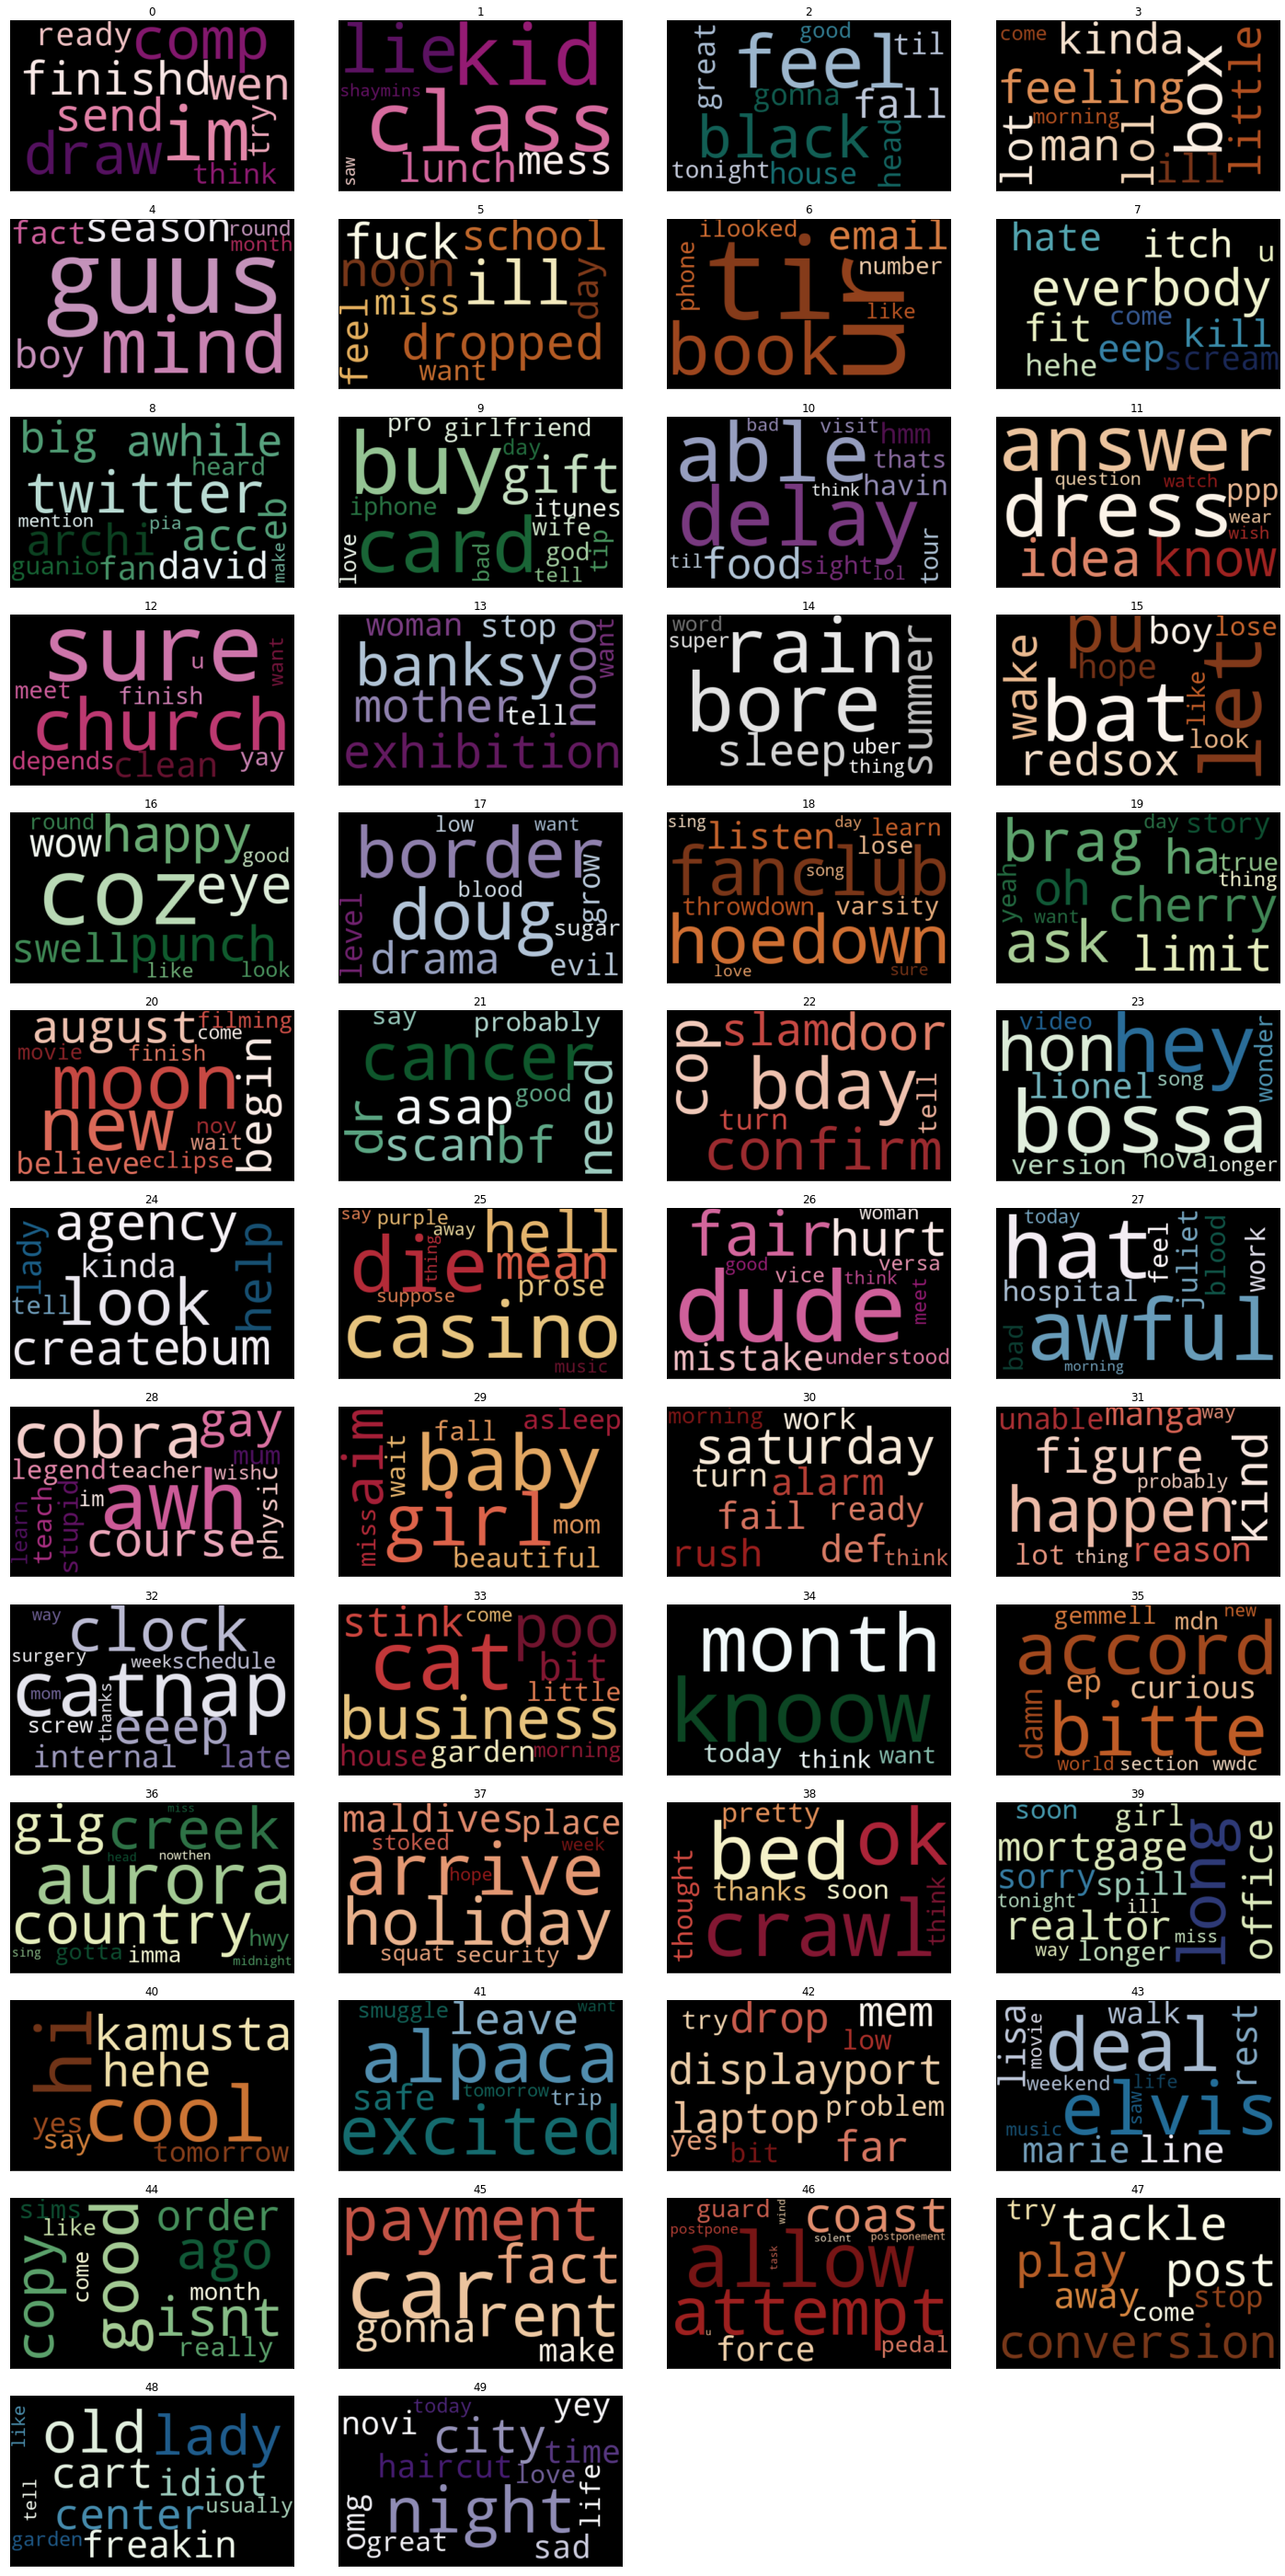

<IPython.core.display.Javascript object>

In [8]:
fig = plotting.wordcloud(docs.T, ncols=4, n_jobs=-1)